#  ¿Cual es la participacion que en el mercado de profesionales de los cientificos de datos tiene Estados Unidos?

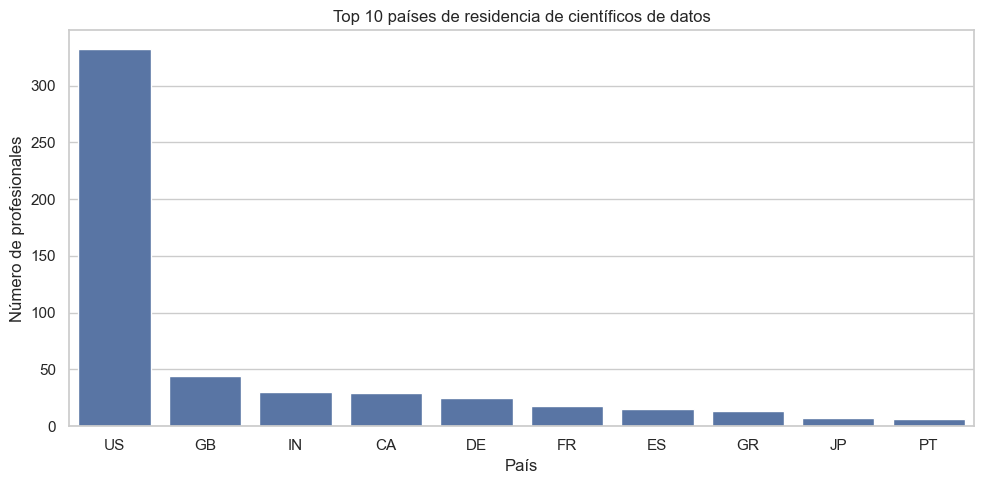

54.69522240527183

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_excel(r"C:\Users\PRC\Downloads\ds_salaries.xlsx") 
df = df.drop(columns=['Unnamed: 0'])
df.isnull().sum()
# Configurar estilo de los gráficos
sns.set(style="whitegrid")

# Calcular participación de EE. UU.
residence_counts = df['employee_residence'].value_counts(normalize=True) * 100
us_participation = residence_counts.get('US', 0)

# Crear gráfico de participación de países
top_residences = df['employee_residence'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_residences.index, y=top_residences.values)
plt.title("Top 10 países de residencia de científicos de datos")
plt.xlabel("País")
plt.ylabel("Número de profesionales")
plt.tight_layout()
plt.show()

us_participation

#  ¿Que estadistico representa la tendencia central de salarios de los cientificos de datos?

> 💬 **Análisis**: La mayor parte de los salarios se concentra entre los 50,000 y 150,000 USD.  
> La distribución es asimétrica positiva (con sesgo hacia la derecha): hay pocos casos con salarios muy altos (hasta 600,000 USD), que se consideran valores atípicos.  
> Tiene una forma de campana pero está desbalanceada hacia los valores altos, lo cual es común en salarios.

> La mayoría de los científicos de datos gana menos de 150,000 USD al año.
>Existe una clara correlación positiva entre el nivel de experiencia y el salario.
>Los niveles Senior y Executive muestran más variabilidad y salarios más altos, pero también tienen más outliers.

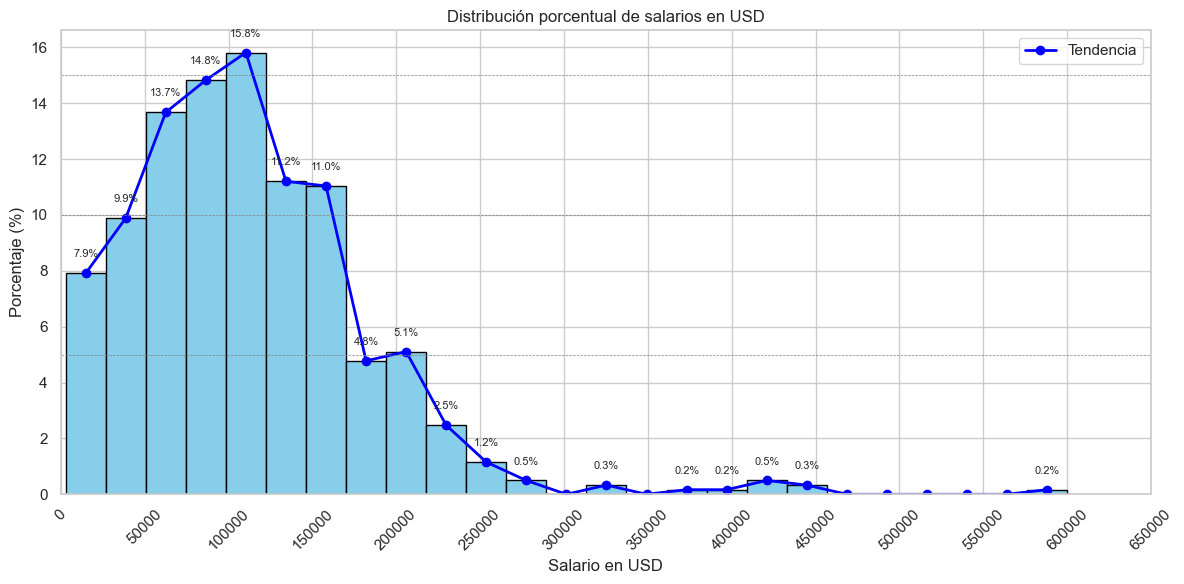

In [92]:
# Crear los datos del histograma
import numpy as np
# Calcular histograma (porcentajes)
counts, bins = np.histogram(df['salary_in_usd'], bins=25)
percentages = (counts / counts.sum()) * 100
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Crear gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(bin_centers, percentages, width=(bins[1] - bins[0]), color='skyblue', edgecolor='black')
plt.plot(bin_centers, percentages, color='blue', marker='o', linestyle='-', linewidth=2, label='Tendencia')

# Líneas horizontales guía
for y in range(0, int(max(percentages)) + 5, 5):
    plt.axhline(y, color='gray', linestyle='--', linewidth=0.5)

# Etiquetas encima de cada barra
for bar, pct in zip(bars, percentages):
    if pct > 0:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                 f'{pct:.1f}%', ha='center', va='bottom', fontsize=8)

# Personalizar eje X
plt.xticks(np.arange(0, 650001, 50000), rotation=45)  # De 0 a 650,000 en pasos de 50,000
plt.xlim(0, 650000)  # Puedes ajustar el rango a (0, 250000) si solo quieres enfocarte en los salarios comunes

# Títulos
plt.title('Distribución porcentual de salarios en USD')
plt.xlabel('Salario en USD')
plt.ylabel('Porcentaje (%)')
plt.legend()
plt.tight_layout()
plt.show()

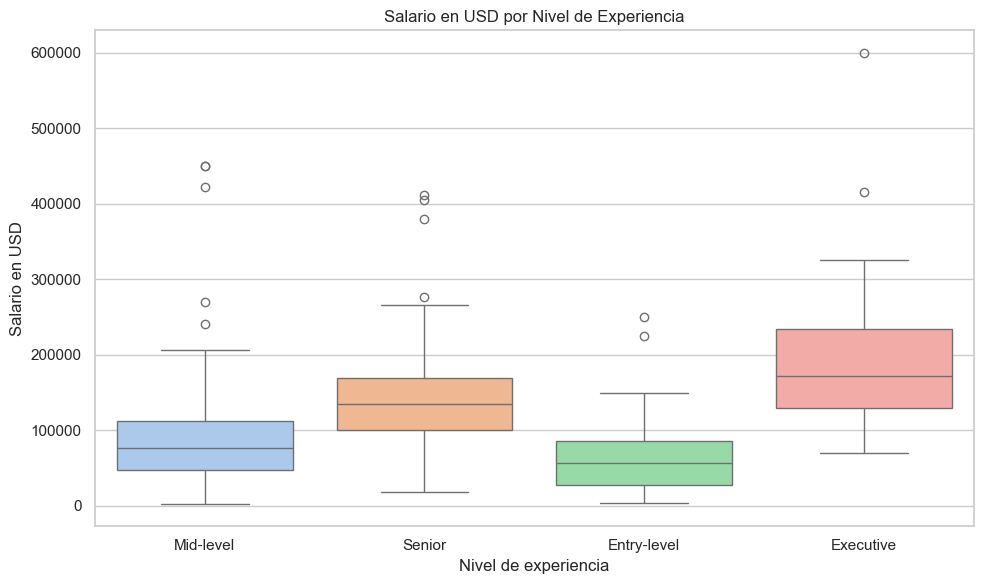

In [85]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd', palette='pastel',hue='experience_level')
plt.title('Salario en USD por Nivel de Experiencia')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Salario en USD')
plt.tight_layout()
plt.show()

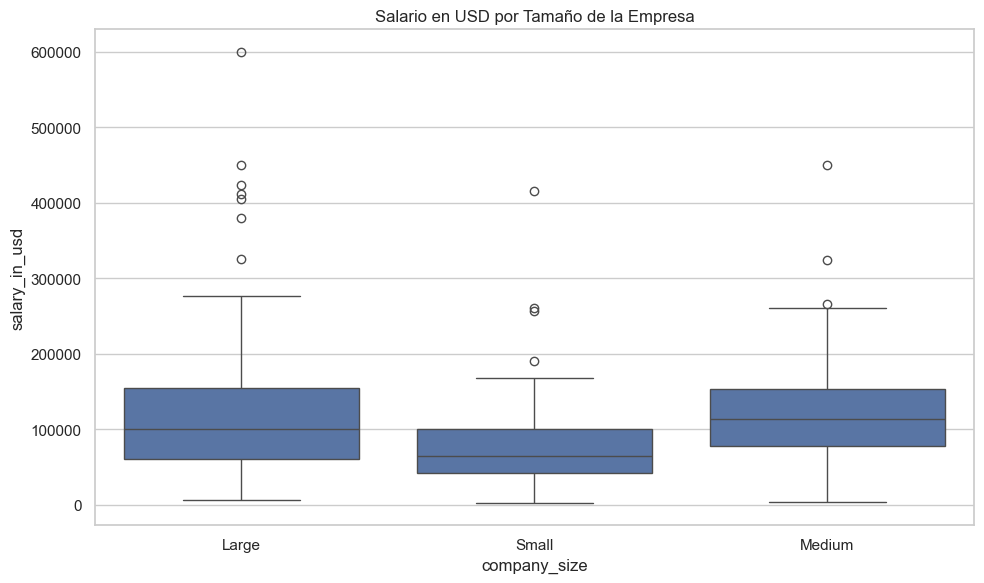

In [78]:

# Boxplots salario por tamaño de la empresa
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='company_size', y='salary_in_usd')
plt.title('Salario en USD por Tamaño de la Empresa')
plt.tight_layout()
plt.show()

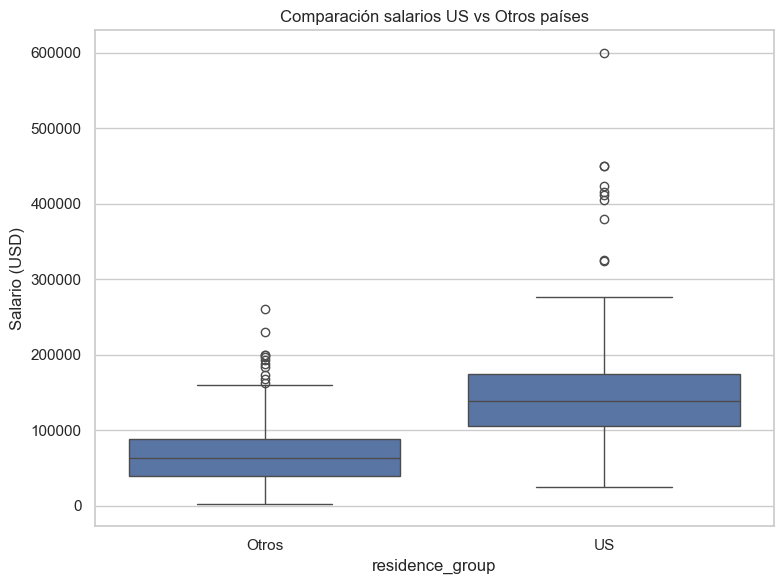

País con salario promedio más alto:
                            mean  count
employee_residence                     
US                  149194.11747    332


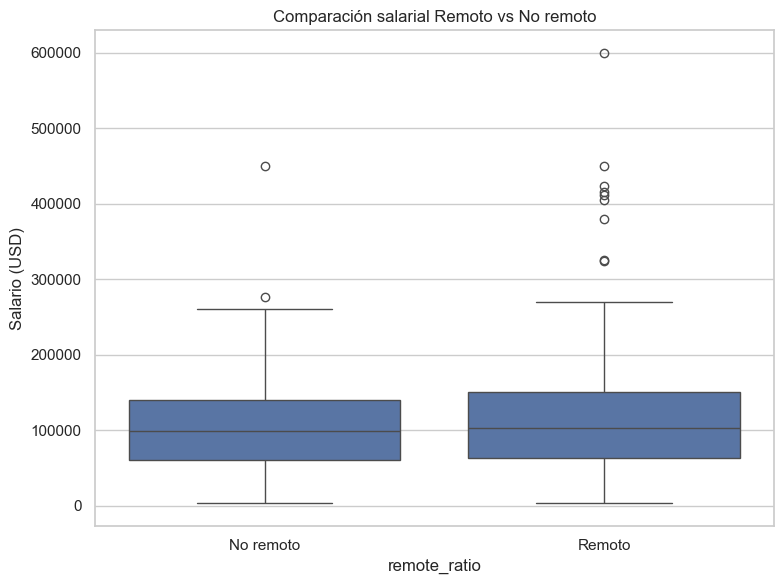

In [50]:
# Otra forma más clara para comparar US vs resto
df['residence_group'] = df['employee_residence'].apply(lambda x: 'US' if x=='US' else 'Otros')
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='residence_group', y='salary_in_usd')
plt.title('Comparación salarios US vs Otros países')
plt.ylabel('Salario (USD)')
plt.tight_layout()
plt.show()


# ---  Análisis comparativos para científicos de datos que trabajan a distancia ---
# Filtramos solo los que trabajan remoto (remoto = 'remote_ratio' > 0, por ejemplo)
# Asumamos que remote_ratio es 0 (no remoto), 50 (híbrido), 100 (100% remoto)
remote_df = df[df['remote_ratio'] > 0]

# Análisis 1: Comparar salarios remoto vs no remoto
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x=df['remote_ratio'].apply(lambda x: 'Remoto' if x>0 else 'No remoto'), y='salary_in_usd')
plt.title('Comparación salarial Remoto vs No remoto')
plt.ylabel('Salario (USD)')
plt.tight_layout()
plt.show()

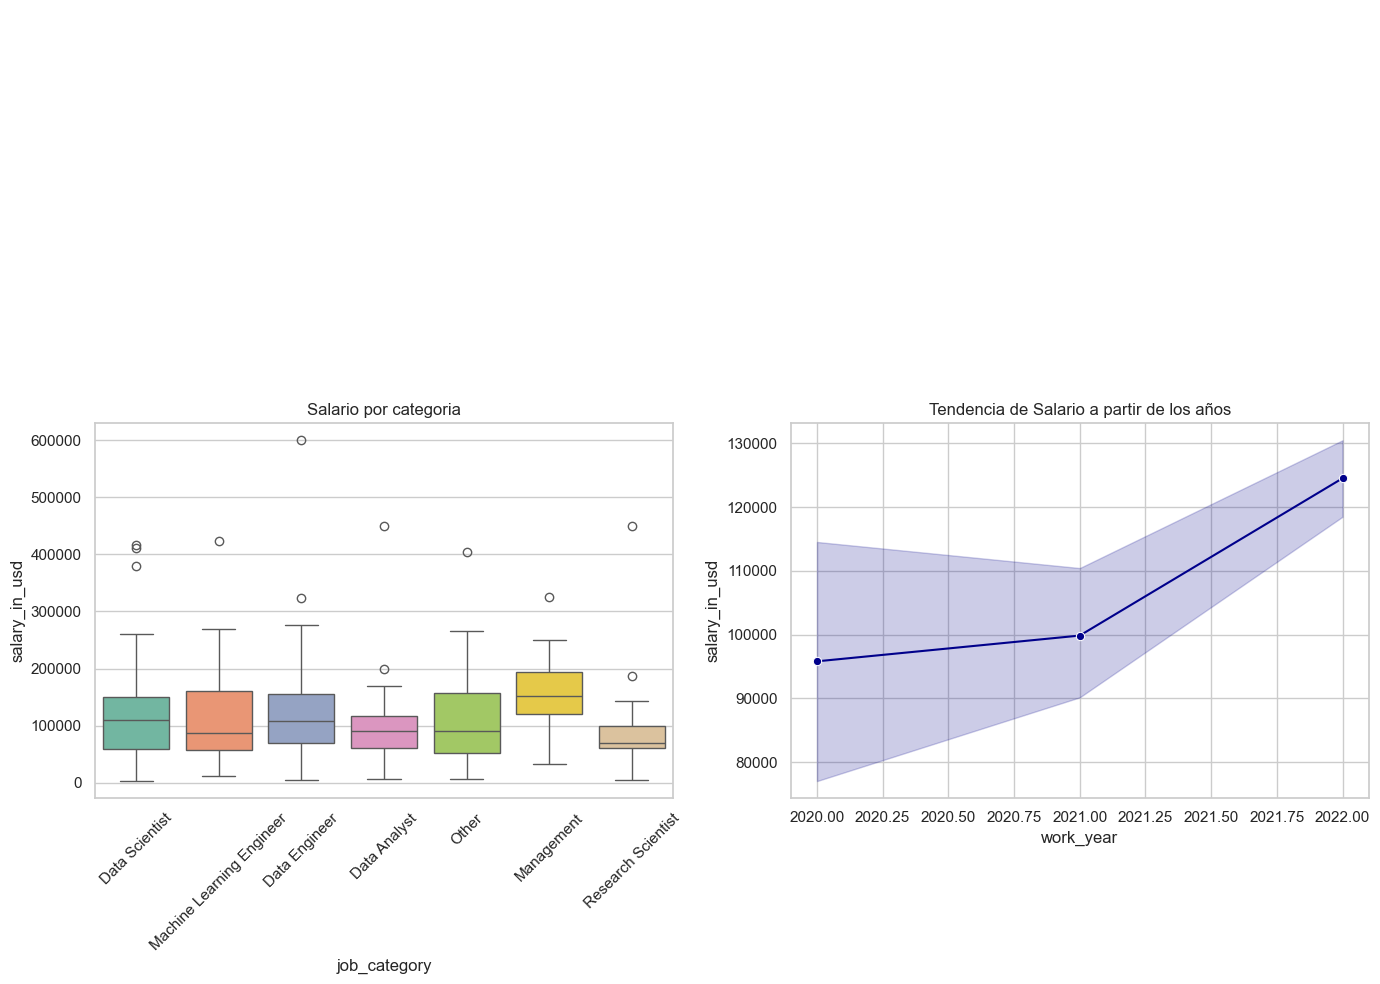

In [86]:
# Crear figura y ejes organizados en 2x2
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico 1: Boxplot de salario por categoría de trabajo
sns.boxplot(
    x='job_category', 
    y='salary_in_usd',
    hue='job_category',  # Asignamos el mismo valor que x
    data=df, 
    ax=axs[1, 0], 
    palette='Set2'
)
axs[1, 0].set_title('Salario por categoria')
axs[1, 0].tick_params(axis='x', rotation=45)

# Gráfico 2: Línea de evolución de salarios por año
sns.lineplot(
    x='work_year', 
    y='salary_in_usd', 
    data=df, 
    ax=axs[1, 1], 
    color='darkblue',
    marker='o'
)
axs[1, 1].set_title('Tendencia de Salario a partir de los años')

# Ocultar los dos primeros subplots si no los usas (puedes poner otros gráficos aquí)
axs[0, 0].axis('off')
axs[0, 1].axis('off')

# Ajustar diseño para evitar traslape
plt.tight_layout()
plt.show()